In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cash_request=pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees=pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [2]:
cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [3]:
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [4]:
# Copia del DataFrame original para evitar modificaciones no deseadas
cr = cash_request.copy()
cr=cr[["amount","created_at","user_id","deleted_account_id","transfer_type"]]
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   amount              23970 non-null  float64
 1   created_at          23970 non-null  object 
 2   user_id             21867 non-null  float64
 3   deleted_account_id  2104 non-null   float64
 4   transfer_type       23970 non-null  object 
dtypes: float64(3), object(2)
memory usage: 936.5+ KB


In [5]:
# Rellenar los valores nulos en la columna 'user_id' con los valores de la columna 'deleted_account_id'
cr.fillna({"user_id": cr["deleted_account_id"]}, inplace=True)
cr.drop(columns=["deleted_account_id"], inplace=True)
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   amount         23970 non-null  float64
 1   created_at     23970 non-null  object 
 2   user_id        23970 non-null  float64
 3   transfer_type  23970 non-null  object 
dtypes: float64(2), object(2)
memory usage: 749.2+ KB


In [6]:
# Convertir las fechas de interés a tipo datetime para facilitar su manipulación
cr['created_at'] = pd.to_datetime(cr['created_at'])
cr.head()

,amount,created_at,user_id,transfer_type
0,100.0,2019-12-10 19:05:21.596873+00:00,804.0,regular
1,100.0,2019-12-10 19:50:12.347780+00:00,231.0,regular
2,100.0,2019-12-10 19:13:35.825460+00:00,191.0,regular
3,99.0,2019-12-10 19:16:10.880172+00:00,761.0,regular
4,100.0,2020-05-06 09:59:38.877376+00:00,7686.0,regular


In [7]:
# Crear una columna 'Mes' que represente el mes de la solicitud de adelanto en efectivo de cada cliente
cr['Mes'] = cr['created_at'].dt.to_period('M')
cr.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_21384\4058608649.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cr['Mes'] = cr['created_at'].dt.to_period('M')


,amount,created_at,user_id,transfer_type,Mes
0,100.0,2019-12-10 19:05:21.596873+00:00,804.0,regular,2019-12
1,100.0,2019-12-10 19:50:12.347780+00:00,231.0,regular,2019-12
2,100.0,2019-12-10 19:13:35.825460+00:00,191.0,regular,2019-12
3,99.0,2019-12-10 19:16:10.880172+00:00,761.0,regular,2019-12
4,100.0,2020-05-06 09:59:38.877376+00:00,7686.0,regular,2020-05


In [8]:
# Crear una columna 'Cohorte' que represente el mes de la primera solicitud de adelanto en efectivo de cada cliente
cr['Cohorte'] = cr.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
cr.head(10)

C:\Users\chris\AppData\Local\Temp\ipykernel_21384\3862736996.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cr['Cohorte'] = cr.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


,amount,created_at,user_id,transfer_type,Mes,Cohorte
0,100.0,2019-12-10 19:05:21.596873+00:00,804.0,regular,2019-12,2019-12
1,100.0,2019-12-10 19:50:12.347780+00:00,231.0,regular,2019-12,2019-12
2,100.0,2019-12-10 19:13:35.825460+00:00,191.0,regular,2019-12,2019-12
3,99.0,2019-12-10 19:16:10.880172+00:00,761.0,regular,2019-12,2019-12
4,100.0,2020-05-06 09:59:38.877376+00:00,7686.0,regular,2020-05,2020-05
5,100.0,2020-05-23 20:58:55.129432+00:00,9489.0,regular,2020-05,2020-05
6,100.0,2020-06-16 17:07:38.452652+00:00,14631.0,regular,2020-06,2020-06
7,100.0,2020-02-10 01:11:53.808270+00:00,309.0,regular,2020-02,2020-01
8,100.0,2020-06-28 12:06:33.712840+00:00,2499.0,regular,2020-06,2020-06
9,90.0,2019-12-10 19:51:23.911206+00:00,897.0,regular,2019-12,2019-12


In [9]:
cr['created_at'].head()

0   2019-12-10 19:05:21.596873+00:00
1   2019-12-10 19:50:12.347780+00:00
2   2019-12-10 19:13:35.825460+00:00
3   2019-12-10 19:16:10.880172+00:00
4   2020-05-06 09:59:38.877376+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [10]:
# Calcular el total de monto del adelanto en efectivo para cada cohorte
cohort_data = cr.groupby('Cohorte')['amount'].sum().reset_index()
cohort_data

,Cohorte,amount
0,2019-11,232.0
1,2019-12,102126.0
2,2020-01,34354.0
3,2020-02,41029.0
4,2020-03,36134.0
5,2020-04,89364.0
6,2020-05,153980.0
7,2020-06,475016.0
8,2020-07,354741.0
9,2020-08,125335.0


In [11]:
# Calcular la cantidad de clientes únicos en cada cohorte
cohort_sizes = cr.groupby('Cohorte').agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes

,Cohorte,Num_Clientes
0,2019-11,1
1,2019-12,254
2,2020-01,106
3,2020-02,90
4,2020-03,86
5,2020-04,246
6,2020-05,432
7,2020-06,1540
8,2020-07,1482
9,2020-08,728


In [12]:
# Calcular el número de clientes únicos en cada cohorte para cada mes
cohort_sizes_monthly = cr.groupby(['Cohorte', 'Mes']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes_monthly

,Cohorte,Mes,Num_Clientes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,680
79,2020-09,2020-11,20
80,2020-10,2020-10,4802
81,2020-10,2020-11,15


In [13]:
# Calcular la cantidad de solicitudes de adelanto de efectivo de los clientes de cada cohorte en cada mes
cohort_cash_monthly = cr.groupby(['Cohorte', 'Mes']).agg(Num_Solicitudes=('user_id', 'count')).reset_index()
cohort_cash_monthly

,Cohorte,Mes,Num_Solicitudes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,727
79,2020-09,2020-11,20
80,2020-10,2020-10,5043
81,2020-10,2020-11,15


In [14]:
# Calcular la cantidad de clientes en cada cohorte
cohort_sizes_initial = cohort_sizes_monthly.groupby('Cohorte').first()
cohort_sizes_initial

,Mes,Num_Clientes
Cohorte,,
2019-11,2019-11,1
2019-12,2019-12,254
2020-01,2020-01,106
2020-02,2020-02,90
2020-03,2020-03,86
2020-04,2020-04,246
2020-05,2020-05,432
2020-06,2020-06,1540
2020-07,2020-07,1482


In [15]:
# Calcular la cantidad de solicitudes de adelanto de efectivo de los clientes en cada cohorte
cohort_cash_initial = cohort_cash_monthly.groupby('Cohorte').first()
cohort_cash_initial

,Mes,Num_Solicitudes
Cohorte,,
2019-11,2019-11,1
2019-12,2019-12,288
2020-01,2020-01,117
2020-02,2020-02,97
2020-03,2020-03,99
2020-04,2020-04,264
2020-05,2020-05,478
2020-06,2020-06,1934
2020-07,2020-07,1996


In [16]:
# Calcular la tasa de retención de clientes
retention_clientes = cohort_sizes_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Clientes').div(cohort_sizes_initial['Num_Clientes'], axis=0)
retention_clientes

Mes,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
2019-12,NaN,1.0,0.354331,0.228346,0.267717,0.263780,0.295276,0.287402,0.232283,0.263780,0.169291,0.244094,0.003937
2020-01,NaN,NaN,1.000000,0.207547,0.150943,0.254717,0.254717,0.254717,0.264151,0.198113,0.188679,0.226415,0.009434
2020-02,NaN,NaN,NaN,1.000000,0.500000,0.466667,0.466667,0.433333,0.433333,0.400000,0.277778,0.377778,NaN
2020-03,NaN,NaN,NaN,NaN,1.000000,0.441860,0.430233,0.523256,0.418605,0.395349,0.337209,0.313953,0.011628
2020-04,NaN,NaN,NaN,NaN,NaN,1.000000,0.471545,0.495935,0.373984,0.325203,0.308943,0.247967,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.590278,0.506944,0.430556,0.340278,0.356481,0.009259
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.490909,0.482468,0.372727,0.367532,0.003247
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.474359,0.344804,0.359649,0.004723


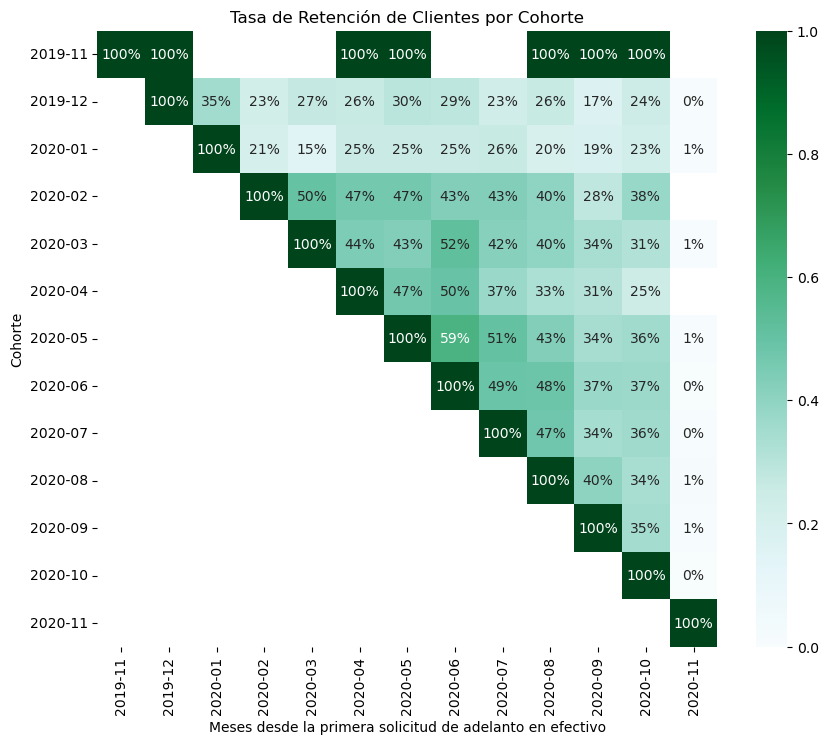

In [17]:
# Graficar la tasa de retención de clientes
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención de Clientes por Cohorte')
sns.heatmap(data=retention_clientes, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn')
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()

In [18]:
# Calcular la tasa de retención de solicitudes de adelanto de efectivo
retention_cash = cohort_cash_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Solicitudes').div(cohort_cash_initial['Num_Solicitudes'], axis=0)
retention_cash

Mes,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,2.000000,NaN
2019-12,NaN,1.0,0.368056,0.218750,0.274306,0.284722,0.298611,0.315972,0.250000,0.291667,0.184028,0.260417,0.003472
2020-01,NaN,NaN,1.000000,0.205128,0.145299,0.299145,0.264957,0.247863,0.264957,0.188034,0.188034,0.213675,0.008547
2020-02,NaN,NaN,NaN,1.000000,0.505155,0.505155,0.463918,0.463918,0.463918,0.453608,0.278351,0.412371,NaN
2020-03,NaN,NaN,NaN,NaN,1.000000,0.424242,0.464646,0.474747,0.404040,0.363636,0.303030,0.303030,0.010101
2020-04,NaN,NaN,NaN,NaN,NaN,1.000000,0.568182,0.571970,0.439394,0.405303,0.337121,0.284091,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.665272,0.573222,0.485356,0.376569,0.364017,0.008368
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.531024,0.494829,0.355222,0.339193,0.002585
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.471443,0.304609,0.298096,0.003507


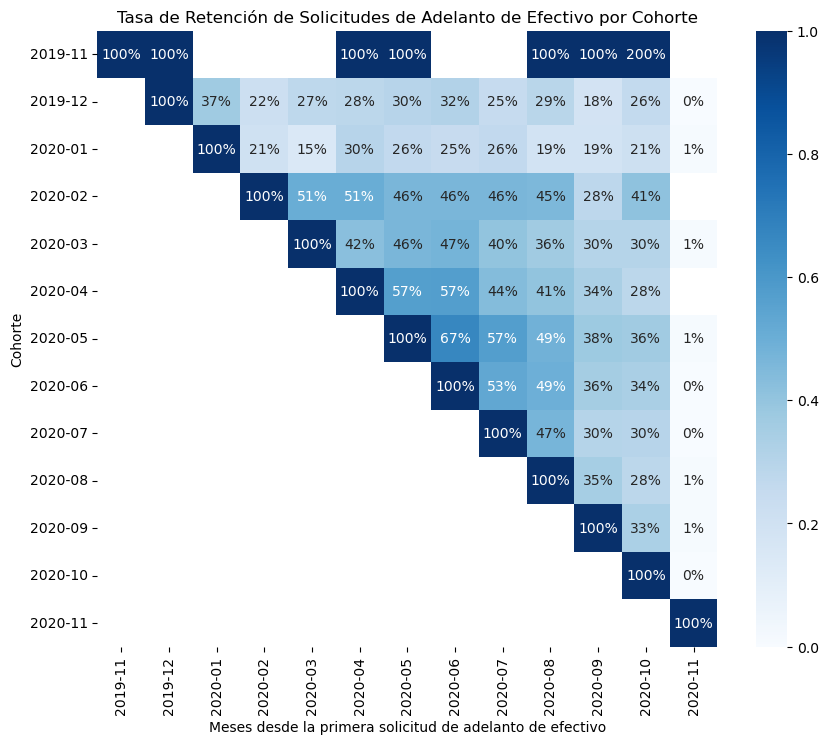

In [19]:
# Graficar la tasa de retención
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención de Solicitudes de Adelanto de Efectivo por Cohorte')
sns.heatmap(data=retention_cash, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='Blues')
plt.xlabel('Meses desde la primera solicitud de adelanto de efectivo')
plt.ylabel('Cohorte')
plt.show()

In [35]:
import pandas as pd
import numpy as np


Mes
2019-11         NaN
2019-12         NaN
2020-01         NaN
2020-02         NaN
2020-03    1.000000
2020-04    0.424242
2020-05    0.464646
2020-06    0.474747
2020-07    0.404040
2020-08    0.363636
2020-09    0.303030
2020-10    0.303030
2020-11         NaN
Freq: M, Name: 2020-03, dtype: float64


In [194]:
import pandas as pd
import numpy as np

# Filtrar el cohorte de 2020-03 y eliminar el dato para noviembre (2020-11) para predicción
retention_cash.loc['2020-03', '2020-11'] = np.nan

# Filtrar los datos de la cohorte de 2020-03
retention_data_2020_03 = retention_cash.loc['2020-03']

# Convertir a DataFrame si no lo es
df_2020_03 = pd.DataFrame(retention_data_2020_03).reset_index()

# Convertir las fechas Period a Timestamps directamente
df_2020_03['Mes'] = pd.to_datetime(df_2020_03['Mes'].astype(str))

# Crear columna con números de mes para regresión
df_2020_03['Mes_num'] = df_2020_03['Mes'].dt.month + (df_2020_03['Mes'].dt.year - 2020) * 12

print(retention_data_2020_03)
# Ver el DataFrame resultante
print(df_2020_03.columns)




Mes
2019-11         NaN
2019-12         NaN
2020-01         NaN
2020-02         NaN
2020-03    1.000000
2020-04    0.424242
2020-05    0.464646
2020-06    0.474747
2020-07    0.404040
2020-08    0.363636
2020-09    0.303030
2020-10    0.303030
2020-11         NaN
Freq: M, Name: 2020-03, dtype: float64
Index(['Mes', 2020-03, 'Mes_num'], dtype='object')


In [196]:
from sklearn.model_selection import train_test_split

# Cambiar el nombre de la columna a string
df_2020_03.columns = df_2020_03.columns.astype(str)
# Definir las variables X (meses como números) e y (tasas de retención para la cohorte 2020-03)
X = df_2020_03['Mes_num'].values.reshape(-1, 1)
y = df_2020_03['2020-03'].values  # Aquí usas la columna "2020-03" para las tasas de retención

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')



X_train: (10, 1), y_train: (10,)
X_test: (3, 1), y_test: (3,)


In [198]:
import numpy as np
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train), posinf=np.nanmax(y_train), neginf=np.nanmin(y_train))

# Ver estadísticas básicas de X_train y y_train
print("X_train stats:")
print("Mean:", np.mean(X_train))
print("Standard Deviation:", np.std(X_train))
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

print("y_train stats:")
print("Mean:", np.mean(y_train))
print("Standard Deviation:", np.std(y_train))
print("Min:", np.min(y_train))
print("Max:", np.max(y_train))



X_train stats:
Mean: 4.8
Standard Deviation: 3.340658617698013
Min: 0
Max: 11
y_train stats:
Mean: 0.5117845117845118
Standard Deviation: 0.174584887676842
Min: 0.30303030303030304
Max: 1.0


In [84]:
!pip install tensorflow

In [200]:
import numpy as np

import numpy as np

# Reemplazar NaN por la media de la columna
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))



In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [206]:
!pip install keras-tuner --upgrade


In [208]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
import keras_tuner as kt

# Definir una función para construir el modelo
def build_model(hp):
    model = Sequential()
    # Primera capa
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=128, step=32),  # Número de neuronas entre 32 y 128
        activation=hp.Choice('activation_1', ['relu', 'tanh', 'sigmoid']),
        input_shape=(X_train.shape[1],)
    ))
    # Capa Dropout
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    # Segunda capa
    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=64, step=16),
        activation=hp.Choice('activation_2', ['relu', 'tanh', 'sigmoid'])
    ))
    # Capa de salida
    model.add(Dense(1))  # Salida para regresión
    # Compilar el modelo
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='mean_squared_error'
    )
    return model

# Configurar el sintonizador (tuner)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Número de combinaciones de hiperparámetros a probar
    executions_per_trial=1,  # Número de veces que se entrena cada modelo
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Realizar la búsqueda
tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Mejores hiperparámetros:")
print(f"Unidades capa 1: {best_hps.get('units_1')}")
print(f"Activación capa 1: {best_hps.get('activation_1')}")
print(f"Dropout capa 1: {best_hps.get('dropout_1')}")
print(f"Unidades capa 2: {best_hps.get('units_2')}")
print(f"Activación capa 2: {best_hps.get('activation_2')}")
print(f"Tasa de aprendizaje: {best_hps.get('learning_rate')}")

# Entrenar un modelo con los mejores hiperparámetros
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)



Trial 10 Complete [00h 00m 07s]
val_loss: 0.03574429452419281

Best val_loss So Far: 9.78934986051172e-06
Total elapsed time: 00h 01m 10s
Mejores hiperparámetros:
Unidades capa 1: 128
Activación capa 1: tanh
Dropout capa 1: 0.4
Unidades capa 2: 64
Activación capa 2: sigmoid
Tasa de aprendizaje: 0.0001567123683813819
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0374 - val_loss: 0.0097
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0289 - val_loss: 0.0089
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0362 - val_loss: 0.0082
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0439 - val_loss: 0.0075
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0323 - val_loss: 0.0069
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0377 - val_loss: 0.0062
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0287 - val_loss: 0.0057
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0272 - val_loss: 0.0052
Epoch 9/100


In [134]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)  # Baja la tasa de aprendizaje
# Crear el modelo de red neuronal
from keras.layers import Dense, Dropout

model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),  # Apaga el 10% de las neuronas
    Dense(32, activation='relu'),
    Dense(1)  # Salida para regresión
])


# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


E:\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3052 - val_loss: 0.2095
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2624 - val_loss: 0.1966
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.2550 - val_loss: 0.1839
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2489 - val_loss: 0.1716
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2120 - val_loss: 0.1600
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1818 - val_loss: 0.1489
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1806 - val_loss: 0.1388
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1680 - val_loss: 0.1291
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1590 - val_loss: 0.1190
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1435 - val_loss: 0.1093
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1120 - val_loss: 0.1001
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1109 - val_loss: 0.0916
Epo

In [174]:
!pip install scikeras


In [180]:
# Importar librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Definir la función para construir el modelo
def create_model(neurons=32, dropout_rate=0.2, learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Crear el modelo SciKerasRegressor
model = KerasRegressor(model=create_model, verbose=0)

# Definir el espacio de hiperparámetros
param_dist = {
    "model__neurons": [16, 32, 64],
    "model__dropout_rate": [0.2, 0.3, 0.4],
    "model__learning_rate": np.logspace(-4, -2, 5),
    "batch_size": [16, 32],
    "epochs": [50, 100]
}

# Definir la métrica de scoring (error cuadrático medio negativo)
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  # Número de combinaciones aleatorias
    cv=3,       # Validación cruzada con 3 pliegues
    scoring=scoring,
    random_state=42
)

# Ajustar el modelo
random_result = random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", random_result.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_model = random_result.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE del modelo optimizado en conjunto de prueba:", mse)



E:\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E:\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E:\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E:\conda\Lib\site-packages\keras\src\layers\co

Mejores hiperparámetros encontrados: {'model__neurons': 16, 'model__learning_rate': 0.0031622776601683794, 'model__dropout_rate': 0.3, 'epochs': 100, 'batch_size': 32}
MSE del modelo optimizado en conjunto de prueba: 0.033038173067913526


In [214]:
# Desescalar las predicciones
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Desescalar los valores reales
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


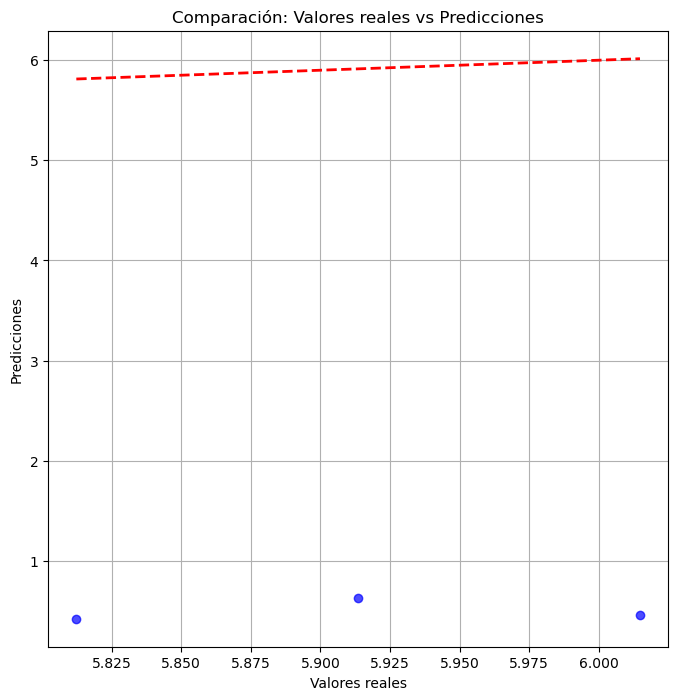

In [222]:
import matplotlib.pyplot as plt

# Gráfico de dispersión
plt.figure(figsize=(8, 8))
plt.scatter(y_test_original, y_pred_original, alpha=0.7, color="blue")
plt.plot([min(y_test_original), max(y_test_original)], 
         [min(y_test_original), max(y_test_original)], 
         color='red', linestyle='--', linewidth=2)  # Línea perfecta
plt.title("Comparación: Valores reales vs Predicciones")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.grid(True)
plt.show()



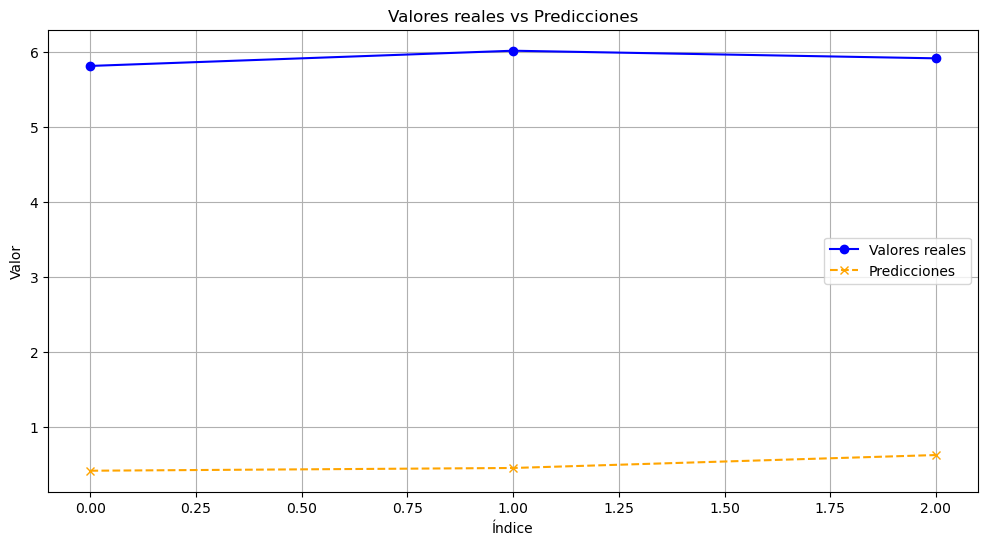

In [224]:
# Gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="Valores reales", marker='o', linestyle='-', color='blue')
plt.plot(y_pred_original, label="Predicciones", marker='x', linestyle='--', color='orange')
plt.title("Valores reales vs Predicciones")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()


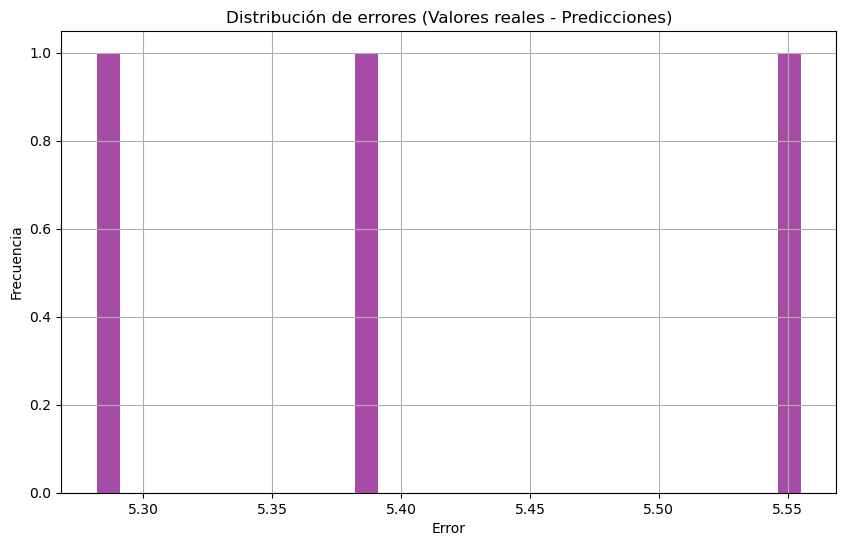

In [226]:
import numpy as np

# Error de predicción
errors = y_test_original - y_pred_original

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, color='purple', alpha=0.7)
plt.title("Distribución de errores (Valores reales - Predicciones)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


In [136]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Pérdida en el conjunto de prueba: {test_loss}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0354
Pérdida en el conjunto de prueba: 0.03538006171584129


In [144]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Comparar algunas predicciones con los valores reales
import pandas as pd
resultados = pd.DataFrame({'Real': y_test.flatten(), 'Predicción': y_pred.flatten()})
print(resultados.head())  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
       Real  Predicción
0  0.303030    0.378210
1  0.363636    0.364366
2  0.333333    0.650331


In [148]:
# Extraer el índice del mes a predecir (noviembre 2020)
noviembre_index = df_2020_03[df_2020_03['Mes'].dt.month == 11].index[0]


In [150]:
# Extraer valores para escalar (excluyendo NaN)
X_scaled = scaler.transform(df_2020_03[['Mes_num']].values)

# Separar el dato de noviembre para predicción
X_noviembre = X_scaled[noviembre_index].reshape(1, -1)


In [152]:
# Realizar la predicción
prediccion_noviembre_scaled = model.predict(X_noviembre)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [156]:
# Actualizar el valor faltante en retention_cash
retention_cash.loc['2020-03', '2020-11'] = prediccion_noviembre[0, 0]

# Confirmar la actualización
print(retention_cash.loc['2020-03'])


Mes
2019-11         NaN
2019-12         NaN
2020-01         NaN
2020-02         NaN
2020-03    1.000000
2020-04    0.424242
2020-05    0.464646
2020-06    0.474747
2020-07    0.404040
2020-08    0.363636
2020-09    0.303030
2020-10    0.303030
2020-11    0.594872
Freq: M, Name: 2020-03, dtype: float64


In [154]:
# Desescalar la predicción
prediccion_noviembre = scaler.inverse_transform(prediccion_noviembre_scaled)


In [140]:
# Hacer predicciones para noviembre de 2020
noviembre_2020_prediccion = model.predict(np.array([11]).reshape(1, -1))
print(f"Predicción para noviembre de 2020: {noviembre_2020_prediccion[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicción para noviembre de 2020: 1.1262080669403076


In [ ]:
import pandas as pd
import numpy as np



# Convertir a DataFrame
df_2020_03 = pd.DataFrame(retention_data_2020_03)

# Convertir fechas a números
df_2020_03['Mes'] = pd.to_datetime(df_2020_03['Mes'], format='%Y-%m').dt.to_period('M')
df_2020_03['Mes_num'] = df_2020_03['Mes'].dt.month + (df_2020_03['Mes'].dt.year - 2020) * 12  # Meses como números

# Mostrar DataFrame
print(df_2020_03)


In [162]:
# Comparar con los meses cercanos
meses_cercanos = retention_cash.loc['2020-03', ['2020-09','2020-10', '2020-11']]
print(meses_cercanos)


Mes
2020-09    0.303030
2020-10    0.303030
2020-11    0.594872
Freq: M, Name: 2020-03, dtype: float64


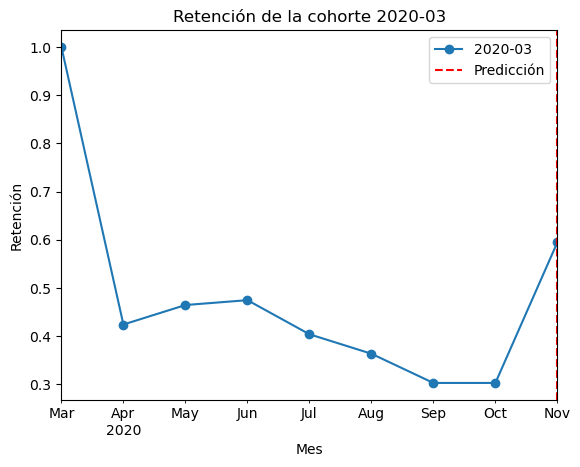

In [158]:
import matplotlib.pyplot as plt

# Graficar la retención histórica de la cohorte
retention_cash.loc['2020-03'].dropna().plot(marker='o')
plt.axvline(x='2020-11', color='red', linestyle='--', label='Predicción')
plt.title("Retención de la cohorte 2020-03")
plt.xlabel("Mes")
plt.ylabel("Retención")
plt.legend()
plt.show()


In [ ]:
retention_cash

In [ ]:
# Filtrar la cohorte 2020-03 y los meses donde no hay NaN
cohorte_target = "2020-03"
train_data = retention_cash.loc[cohorte_target].dropna()
X_train = np.arange(1, len(train_data) + 1).reshape(-1, 1)  # Meses (1, 2, 3...)
y_train = train_data.values  # Tasas de retención

print("Datos de entrenamiento:")
print("X_train:", X_train)
print("y_train:", y_train)


In [ ]:
# Entrenar un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Mostrar coeficientes
print(f"Intercepto: {modelo.intercept_}, Coeficiente: {modelo.coef_}")


In [ ]:
# Generar la entrada correspondiente a noviembre de 2020
X_noviembre = np.array([[len(train_data) + 1]])  # Noviembre es el siguiente mes

# Predicción
y_pred_noviembre = modelo.predict(X_noviembre)

print(f"Predicción para noviembre de 2020 (cohorte {cohorte_target}): {y_pred_noviembre[0]}")


In [ ]:
# Actualizar la cohorte con la predicción
retention_cash.loc[cohorte_target, "2020-11"] = y_pred_noviembre[0]

# Verificar el DataFrame actualizado
print(retention_cash)


In [ ]:
# Predecir valores del conjunto de entrenamiento
y_pred_train = modelo.predict(X_train)

# Calcular residuos
residuos = y_train - y_pred_train

# Graficar los residuos
plt.figure(figsize=(8, 4))
plt.scatter(X_train, residuos, color='blue', label="Residuos")
plt.axhline(0, color='red', linestyle='--', label="Base Residual")
plt.title("Análisis de Residuos")
plt.xlabel("Mes")
plt.ylabel("Residuos")
plt.legend()
plt.show()


In [ ]:
plt.hist(residuos, bins=30, edgecolor='black')
plt.axvline(0, color='red', linestyle='--')  # Línea base (cero)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()



In [ ]:
# Convertir las columnas a cadenas para usarlas como etiquetas en el gráfico
retention_cash.columns = retention_cash.columns.astype(str)


plt.figure(figsize=(10, 6))

# Graficar todas las cohortes
for cohorte in retention_cash.index:
    plt.plot(retention_cash.columns, retention_cash.loc[cohorte], marker='o', label=cohorte, alpha = 0.3)

# Destacar la cohorte objetivo
plt.plot(retention_cash.columns, retention_cash.loc[cohorte_target], marker='o', label=f"{cohorte_target} (target)", linewidth=3, color='red')

plt.title("Tasa de Retención por Cohorte (incluyendo predicción para noviembre de 2020)")
plt.xlabel("Mes")
plt.ylabel("Tasa de Retención")
plt.legend(title="Cohortes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [ ]:
# Calcular la cantidad de adelanto de efectivo por cohorte y mes
cohort_revenue = cr.groupby(['Cohorte', 'Mes'])['amount'].sum().reset_index()
cohort_revenue = cohort_revenue.pivot(index='Cohorte', columns='Mes', values='amount')
cohort_revenue

# **Análisis de Cohortes Avanzado y la Extracción de Insights**

El análisis de cohortes avanzado y la extracción de insights son componentes cruciales en el ámbito del análisis de datos y la toma de decisiones estratégicas en diversos campos, desde el marketing digital hasta la gestión de productos y servicios. Ambos procesos permiten entender mejor el comportamiento de los usuarios, identificar patrones significativos y tomar decisiones fundamentadas en datos. A continuación, se detallan algunas estrategias comunes para llevar a cabo estas prácticas:


## **Análisis de Cohortes Avanzado:**

El análisis de cohortes se refiere a la agrupación de individuos que comparten una característica común o que han experimentado un evento similar en un período específico de tiempo. El análisis avanzado de cohortes implica el uso de técnicas más sofisticadas para comprender mejor el comportamiento de estos grupos a lo largo del tiempo y extraer insights valiosos. A continuación, se detallan técnicas y enfoques comunes:

1. **Refinamiento de Cohortes:**

    - **Segmentación adicional de cohortes:** Divide los grupos en subconjuntos más específicos basados en características demográficas (edad, género, ubicación), comportamientos específicos (frecuencia de compra, interacciones en línea) o patrones de uso (horarios de uso, dispositivos utilizados). Esto permite una comprensión más profunda de los comportamientos y necesidades de diferentes grupos de usuarios.
    - **Utilización de técnicas de clustering:** Aplica algoritmos de agrupamiento para identificar subgrupos dentro de las cohortes principales. Esto te permite descubrir patrones más complejos y segmentar los datos de manera más precisa, lo que facilita la personalización de estrategias y acciones.

2. **Análisis de Retención:**
    - **Seguimiento de la retención:** Observa cómo cambia la cantidad de usuarios activos dentro de cada cohorte a lo largo del tiempo. Esto te ayuda a comprender si los usuarios permanecen comprometidos con tu producto o servicio y a identificar posibles problemas de retención.
    - **Identificación de factores de retención:** Examina qué factores influyen en la retención de los usuarios (como la calidad del producto, la experiencia del usuario o las promociones). Luego, desarrolla estrategias para mejorar la retención basadas en estos hallazgos, lo que puede incluir mejoras en la experiencia del usuario, ofertas especiales o programas de fidelización.

3. **Cohortes Dinámicas:**
    - **Creación de cohortes dinámicas:** Actualiza continuamente las cohortes para reflejar los cambios en el comportamiento del usuario o las características del producto. Esto te permite mantener un seguimiento preciso de la evolución del rendimiento a lo largo del tiempo y adaptar tus estrategias en consecuencia.
    - **Uso de modelos predictivos:** Implementa modelos que puedan predecir el comportamiento futuro de las cohortes en función de datos históricos y variables clave. Esto te ayuda a anticipar tendencias y tomar decisiones proactivas, como la personalización de ofertas o la optimización de la distribución de recursos.

4. **Análisis de Recurrencia:**
    - **Estudio de la frecuencia de retorno:** Analiza qué tan a menudo los usuarios regresan después de su primera interacción con tu producto o servicio. Esto te permite entender la lealtad del cliente y su propensión a continuar utilizando tu oferta.
    - **Identificación de patrones recurrentes:** Busca patrones en el comportamiento de los usuarios que indican una alta probabilidad de regreso, como la frecuencia de compra o la participación en actividades específicas. Estos patrones pueden ser clave para desarrollar estrategias efectivas de retención y compromiso.

5. **Análisis de Comportamiento:**
    - **Seguimiento del comportamiento individual:** Examina cómo se comportan los usuarios dentro de cada cohorte a lo largo del tiempo. Esto te ayuda a identificar tendencias, cambios de comportamiento y momentos clave en el ciclo de vida del usuario, lo que puede informar la optimización de la experiencia del usuario y la personalización de las estrategias de marketing.
    - **Identificación de patrones y puntos de inflexión:** Busca momentos en los que el comportamiento de los usuarios cambie significativamente, como la adopción de nuevas características o la disminución de la actividad. Estos puntos de inflexión pueden ser oportunidades para la intervención y la mejora continua del producto o servicio.

## **Extracción de Insights:**

La extracción de insights implica el proceso de identificar y comprender información significativa y útil a partir de los datos analizados. A continuación, se detallan algunas estrategias comunes para extraer insights del análisis de cohortes:

1. **Segmentación Avanzada:**
    - **Segmentación detallada de las cohortes:** Divide los grupos en segmentos más específicos basados en características compartidas o comportamientos similares. Esto te permite personalizar tus estrategias para satisfacer las necesidades únicas de cada segmento, lo que puede mejorar la efectividad de tus acciones y campañas.
    - **Personalización de estrategias:** Utiliza los segmentos identificados para adaptar tus estrategias de marketing, comunicación y experiencia del usuario, lo que aumenta la relevancia y la efectividad de tus acciones y mejora la satisfacción del cliente.

2. **Identificación de Tendencias:**
    - **Detección de tendencias a lo largo del tiempo:** Analiza cómo evolucionan las métricas clave (como la retención o el compromiso) dentro de cada cohorte con el tiempo. Esto te ayuda a identificar patrones y entender cómo ciertos eventos o cambios afectan el comportamiento de los usuarios, lo que puede informar decisiones estratégicas futuras.
    - **Análisis de eventos específicos:** Examina cómo eventos como lanzamientos de productos, campañas de marketing o cambios en el diseño impactan en el comportamiento de las cohortes. Esto te proporciona información valiosa para la planificación futura y la evaluación del éxito de tus iniciativas.

3. **Predicción y Modelado:**
    - **Utilización de modelos predictivos:** Implementa modelos que puedan predecir el comportamiento futuro de las cohortes en función de datos históricos y variables clave. Esto te ayuda a anticipar tendencias y tomar decisiones informadas sobre estrategias futuras, lo que puede aumentar la eficiencia y el éxito de tus acciones.
    - **Evaluación de impacto:** Evalúa el impacto potencial de cambios en productos, servicios o estrategias antes de implementarlos. Esto te permite tomar decisiones más sólidas y minimizar los riesgos asociados con nuevas iniciativas, lo que puede mejorar la rentabilidad y la satisfacción del cliente a largo plazo.

4. **Benchmarking y Comparación:**
    - **Comparación del rendimiento:** Compara el rendimiento de diferentes cohortes o segmentos de usuarios para identificar áreas de fortaleza y oportunidades de mejora. Esto te ayuda a entender tu posición en el mercado y a identificar estrategias para diferenciarte y destacarte entre la competencia.
    - **Benchmarking contra competidores:** Compara tus métricas con las de tus competidores o estándares de la industria para entender tu posición en el mercado y encontrar oportunidades para diferenciarte. Esto te proporciona información valiosa sobre las mejores prácticas y te ayuda a identificar áreas de mejora y oportunidades de crecimiento.

5. **Acciones Estratégicas:**
   - **Desarrollo de estrategias específicas:** Utiliza los insights obtenidos para desarrollar estrategias específicas destinadas a mejorar la retención, el compromiso y el crecimiento de tu negocio. Esto puede incluir cambios en productos o servicios, ajustes en la estrategia de marketing o mejoras en la experiencia del cliente.
   - **Evaluación continua:** Evalúa regularmente la efectividad de tus estrategias a través del análisis de cohortes en curso y realiza ajustes según sea necesario para optimizar los resultados a lo largo del tiempo. Esto te permite adaptarte a los cambios en el mercado y mantener una ventaja competitiva a largo plazo.


In [ ]:
# Graficar la cantidad de adelanto de efectivo por cohorte y mes
plt.figure(figsize=(10, 8))
plt.title('Cantidad de adelanto de efectivo por Cohorte y Mes')
sns.heatmap(data=cohort_revenue, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8})
plt.xlabel('Mes')
plt.ylabel('Cohorte')
plt.show()

In [ ]:
# Crear DataFrame de cohortes para el mes de '2020-03'
cohort_amount_2020_03 = cr[cr['Cohorte'] == '2020-03'].groupby('user_id')['amount'].sum().reset_index()
cohort_amount_2020_03

In [ ]:
sort_cohort_amount_2020_03 = cohort_amount_2020_03.sort_values(by='amount', ascending=False)
sort_cohort_amount_2020_03

In [ ]:
top_10_users = sort_cohort_amount_2020_03.head(10)
top_10_users

In [ ]:
# Filtrar para incluir solo los 10 usuarios seleccionados
amount_2020_03 = cr[cr['Cohorte'] == '2020-03'].groupby(['user_id', 'Mes'])['amount'].sum().reset_index()
cohort_amount_2020_03_top10 = amount_2020_03[amount_2020_03['user_id'].isin(top_10_users['user_id'])]
cohort_amount_2020_03_top10 = cohort_amount_2020_03_top10.pivot(index='user_id', columns='Mes', values='amount')
cohort_amount_2020_03_top10

In [ ]:
# Graficar la cantidad de adelanto de efectivo de un cohorte por meses y numero de usuarios
plt.figure(figsize=(10, 8))
plt.title('Cantidad de adelanto de efectivo del cohorte 2020-03 por meses y numero de usuario')
sns.heatmap(data=cohort_amount_2020_03_top10, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8})
plt.xlabel('Mes')
plt.ylabel('Numero de Usuario')
plt.show()

In [ ]:
# Copia del DataFrame original para evitar modificaciones no deseadas
cr = cash_request.copy()
cr=cr[["amount","created_at","user_id","deleted_account_id","transfer_type"]]

# Convertir las fechas de interés a tipo datetime para facilitar su manipulación
cr['created_at'] = pd.to_datetime(cr['created_at'])

cr.info()

In [ ]:
# Crear una columna 'Mes' que represente el mes de la solicitud de adelanto en efectivo de cada cliente
cr['Mes'] = cr['created_at'].dt.to_period('M')
cr.head()

In [ ]:
# Crear una nueva columna 'Semana_Mes' que combine la semana y el mes
cr['Semana_Mes'] = cr['created_at'].dt.strftime('%U_%B')
cr.head()

In [ ]:
# Crear una nueva columna 'Dia_Semana_Num_Semana' que combine el nombre del día de la semana y el número de la semana
cr['Dia_Semana'] = cr['created_at'].dt.strftime('%A') + '_' + cr['created_at'].dt.strftime('%U')
cr.head()


In [ ]:
# Crear una nueva columna 'Hora' que represente la hora de la solicitud
cr['Hora'] = cr['created_at'].dt.hour
cr.head()

In [ ]:
# Crear una columna 'Cohorte' que represente el mes de la primera solicitud de adelanto en efectivo de cada cliente
cr['Cohorte'] = cr.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
cr.head()